 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [112]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [113]:
whale_file = Path('whale_returns.csv')

In [114]:
# Reading whale returns
whale = pd.read_csv(whale_file, index_col = 'Date',parse_dates=True,infer_datetime_format=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [115]:
type(whale.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [116]:

# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [117]:
# Drop nulls
whale.dropna(inplace=True)

In [118]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [119]:
algo_returns= Path('algo_returns.csv')

In [120]:
# Reading algorithmic returns
Algo = pd.read_csv(algo_returns, index_col = 'Date',parse_dates=True,infer_datetime_format=True)
Algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [121]:
# Count nulls
Algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [122]:
#Drop Nulls
Algo.dropna(inplace=True)

In [123]:
# Count nulls
Algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [124]:
TSX_60 = Path('sp_tsx_history.csv')


In [125]:
# Reading S&P TSX( 60 Closing Prices
TSX = pd.read_csv(TSX_60, index_col = 'Date',parse_dates=True,infer_datetime_format=True)
TSX.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [126]:
# Check Data Types
TSX.info()
TSX.dtypes
print(type(TSX.index[0]))
print(type(TSX['Close'][0]))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>


In [127]:
# Fix Data Types



TSX ['Close'] = TSX['Close'].str.replace(',', '')
TSX ['Close'] = TSX['Close'].str.replace('$', '')
TSX['Close'] = pd.to_numeric(TSX['Close'])
TSX.head()
type(TSX['Close'][0])

/Users/michaelaviel/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


numpy.float64

In [128]:
TSX.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [129]:
TSX['Close'] = TSX['Close'].astype(float)
TSX.dtypes

Close    float64
dtype: object

In [130]:
# Calculate Daily Returns
TSX['Close-1'] = TSX['Close'].shift(1)
TSX.head()

,Close,Close-1
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,12370.19
2012-10-03,12359.47,12391.23
2012-10-04,12447.68,12359.47
2012-10-05,12418.99,12447.68


In [131]:
TSX['daily_returns'] = TSX[ 'Close'].pct_change(1)
TSX.head()

,Close,Close-1,daily_returns
Date,,,
2012-10-01,12370.19,NaN,NaN
2012-10-02,12391.23,12370.19,0.001701
2012-10-03,12359.47,12391.23,-0.002563
2012-10-04,12447.68,12359.47,0.007137
2012-10-05,12418.99,12447.68,-0.002305


In [132]:
# Drop nulls
TSX.dropna(inplace=True)

# Count nulls
TSX.isnull().sum()

Close            0
Close-1          0
daily_returns    0
dtype: int64

In [133]:
# Rename `Close` Column to be specific to this portfolio.
TSX.rename(columns={'Close' : 'Daily_Opening_Price', 'Close-1' : 'Daily_Closing_Price'}, inplace=True)
TSX.head()                  

,Daily_Opening_Price,Daily_Closing_Price,daily_returns
Date,,,
2012-10-02,12391.23,12370.19,0.001701
2012-10-03,12359.47,12391.23,-0.002563
2012-10-04,12447.68,12359.47,0.007137
2012-10-05,12418.99,12447.68,-0.002305
2012-10-09,12273.57,12418.99,-0.011709


In [134]:
TSX_returns = TSX.drop(['Daily_Opening_Price','Daily_Closing_Price'],axis=1)
TSX_returns.head()

,daily_returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [135]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.


In [136]:
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


---

In [137]:
Algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [138]:
Joint_returns=TSX_returns.join(whale)
Joint_portfolio=Joint_returns.join(Algo).dropna()
Joint_portfolio.head()


,daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.003371,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001344,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,-0.006555,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

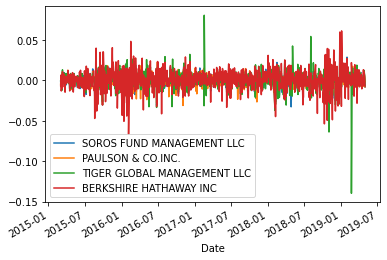

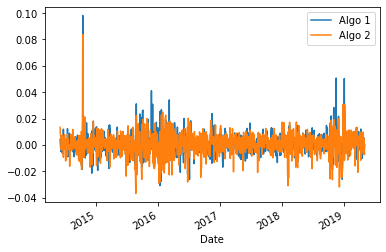

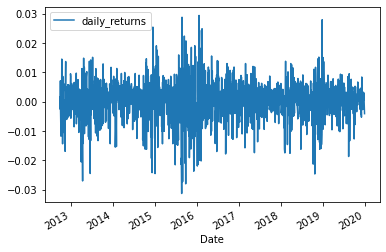

In [139]:
# Plot daily returns of all portfolios
whale.plot()
Algo.plot()
TSX_returns.plot()


#### Calculate and Plot cumulative returns.

In [140]:
# Calculate cumulative returns of all portfolios
portfolio = (Joint_portfolio+1).cumprod()
portfolio.head()



,daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.991470,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051
2015-03-04,0.988128,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464
2015-03-05,0.989456,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794
2015-03-06,0.979589,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267
2015-03-09,0.973168,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563


---

<AxesSubplot:xlabel='Date'>

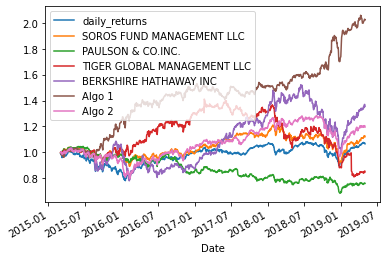

In [141]:
portfolio.plot()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

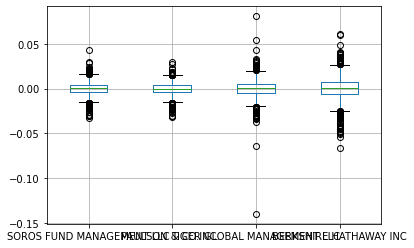

In [142]:
# Box plot to visually show risk
whale.boxplot()

<AxesSubplot:>

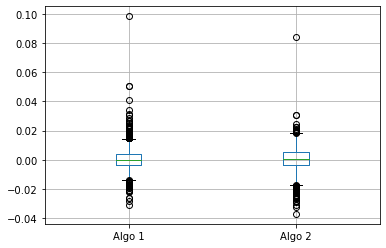

In [143]:
Algo.boxplot()

<AxesSubplot:>

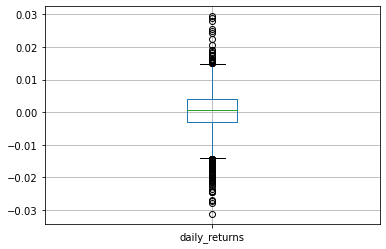

In [144]:
TSX_returns.boxplot()

### Calculate Standard Deviations

In [145]:
# Calculate the daily standard deviations of all portfolios
daily_std = portfolio.std()
daily_std

daily_returns                  0.064354
SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [146]:
# Calculate  the daily standard deviation of S&P TSX 60

daily_std_TSX = TSX_returns.std()
daily_std_TSX

daily_returns    0.006637
dtype: float64

In [147]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std.sort_values(ascending=False, inplace=True)
daily_std

Algo 1                         0.258839
BERKSHIRE HATHAWAY INC         0.196871
TIGER GLOBAL MANAGEMENT LLC    0.148722
Algo 2                         0.116607
PAULSON & CO.INC.              0.090735
SOROS FUND MANAGEMENT LLC      0.070271
daily_returns                  0.064354
dtype: float64

In [148]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std

Algo 1                         4.108944
BERKSHIRE HATHAWAY INC         3.125227
TIGER GLOBAL MANAGEMENT LLC    2.360896
Algo 2                         1.851072
PAULSON & CO.INC.              1.440370
SOROS FUND MANAGEMENT LLC      1.115525
daily_returns                  1.021582
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [149]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_std = portfolio.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

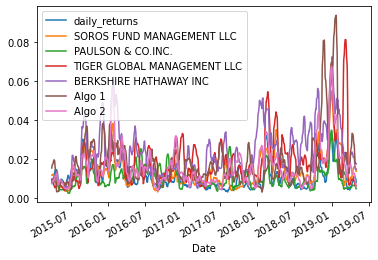

In [150]:
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [151]:
# Calculate the correlation

correlation = rolling_std.corr()

In [152]:
# Display de correlation matrix

correlation

,daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
daily_returns,1.000000,0.711822,0.436038,0.421851,0.563226,0.473254,0.767250
SOROS FUND MANAGEMENT LLC,0.711822,1.000000,0.527971,0.459249,0.740752,0.553364,0.827780
PAULSON & CO.INC.,0.436038,0.527971,1.000000,0.248308,0.294088,0.371858,0.557116
TIGER GLOBAL MANAGEMENT LLC,0.421851,0.459249,0.248308,1.000000,0.416665,0.342956,0.479924
BERKSHIRE HATHAWAY INC,0.563226,0.740752,0.294088,0.416665,1.000000,0.457529,0.669220
Algo 1,0.473254,0.553364,0.371858,0.342956,0.457529,1.000000,0.548233
Algo 2,0.767250,0.827780,0.557116,0.479924,0.669220,0.548233,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [153]:
# Calculate covariance of a single portfolio
np.cov(whale, bias=True)

array([[ 6.37737710e-06, -5.39766946e-06, -3.39717774e-06, ...,
        -2.83812190e-07,  3.06257058e-06, -1.73204587e-06],
       [-5.39766946e-06,  6.71687780e-06,  3.46016303e-06, ...,
        -2.45898586e-06, -2.91150240e-06,  2.69056283e-06],
       [-3.39717774e-06,  3.46016303e-06,  2.45051563e-06, ...,
        -8.68572593e-08, -1.91630841e-06, -4.40100386e-07],
       ...,
       [-2.83812190e-07, -2.45898586e-06, -8.68572593e-08, ...,
         3.91618599e-06,  6.08425851e-08, -3.21084204e-06],
       [ 3.06257058e-06, -2.91150240e-06, -1.91630841e-06, ...,
         6.08425851e-08,  1.59956090e-06, -3.16760775e-07],
       [-1.73204587e-06,  2.69056283e-06, -4.40100386e-07, ...,
        -3.21084204e-06, -3.16760775e-07,  7.14135164e-06]])

In [154]:
portfolio.head()

,daily_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.991470,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051
2015-03-04,0.988128,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464
2015-03-05,0.989456,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794
2015-03-06,0.979589,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267
2015-03-09,0.973168,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563


In [192]:
# Calculate variance of S&P TSX
var = portfolio['daily_returns'].rolling(window=60).var()
var

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000393
2019-04-26    0.000384
2019-04-29    0.000375
2019-04-30    0.000359
2019-05-01    0.000345
Name: daily_returns, Length: 1029, dtype: float64

In [193]:
# log_returns = np.log(STOCK_PRICE/STOCK_PRICE.shift())
cov = portfolio["Algo 1"].rolling(window = 60).cov(portfolio["daily_returns"])
cov

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000536
2019-04-26    0.000516
2019-04-29    0.000500
2019-04-30    0.000478
2019-05-01    0.000466
Length: 1029, dtype: float64

In [194]:
# Computing beta

beta = cov/var
beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.361811
2019-04-26    1.345855
2019-04-29    1.333663
2019-04-30    1.330738
2019-05-01    1.350197
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

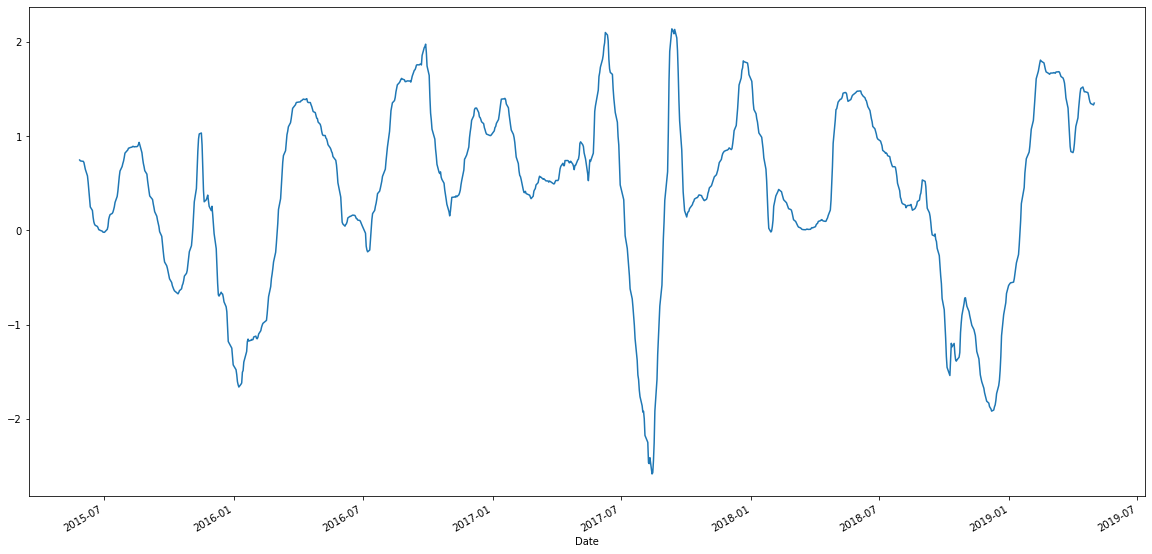

In [195]:
# Plot beta trend

beta.plot(figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Michael EWM'}, xlabel='Date'>

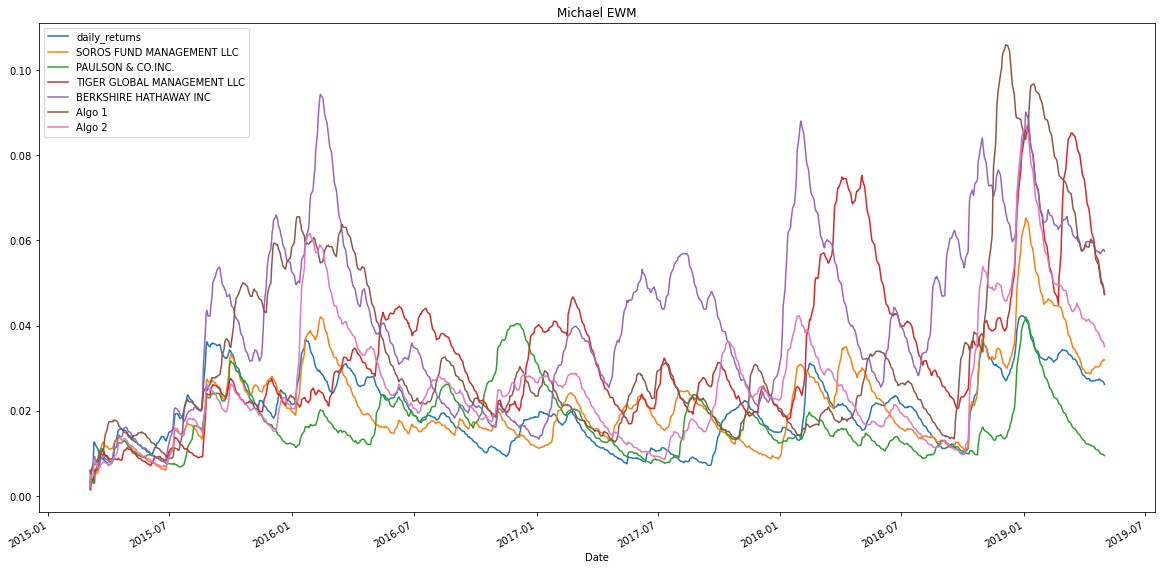

In [205]:
# Use `ewm` to calculate the rolling window

portfolio.ewm(21).std().plot(figsize = (20,10), title = 'Michael EWM')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [208]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio.mean() * 252) / (portfolio.std() * np.sqrt(252))
sharpe_ratios

daily_returns                  241.649046
SOROS FUND MANAGEMENT LLC      237.304917
PAULSON & CO.INC.              152.574024
TIGER GLOBAL MANAGEMENT LLC    121.740692
BERKSHIRE HATHAWAY INC          88.848968
Algo 1                          88.449663
Algo 2                         146.079712
dtype: float64

<AxesSubplot:title={'center':'Michael EWM'}>

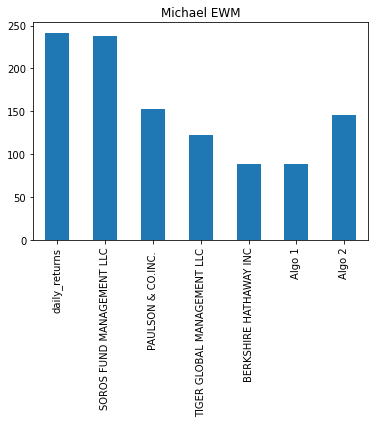

In [213]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar',title = 'Michael sharpe ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [206]:
# Reading data from 1st stock
shop_historical = Path('shop_historical.csv')

In [207]:
shop = pd.read_csv(shop_historical, index_col = 'Date',parse_dates=True,infer_datetime_format=True)
shop.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [111]:
# Reading data from 2nd stock
OTEX = Path('shop_historical.csv')

In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!